<a href="https://colab.research.google.com/github/AayanHidol/NNZH-by-Andrej-Karpathy/blob/main/Building_makemore_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!wget https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt

--2025-07-15 16:00:14--  https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt.1’

names.txt.1         100%[===================>] 222.80K  --.-KB/s    in 0.02s   

2025-07-15 16:00:14 (14.3 MB/s) - ‘names.txt.1’ saved [228145/228145]



In [233]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [234]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [235]:
len(words)

32033

In [236]:
# build the vocabulary of characters and mappings to / from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


 ### Build the dataset

In [237]:
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [91]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [92]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [93]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [94]:
C = torch.randn((27, 2))

In [95]:
C[5]

tensor([-0.1600, -1.7973])

In [96]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [97]:
F.one_hot(torch.tensor(5), num_classes=27).dtype

torch.int64

In [98]:
# F.one_hot(torch.tensor(5), num_classes=27) @ C # this will error

In [99]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.1600, -1.7973])

In [100]:
C[[5, 6, 7]]

tensor([[-0.1600, -1.7973],
        [-1.1015, -0.5591],
        [-0.6663,  0.4454]])

In [101]:
C[X]

tensor([[[-0.5265, -0.3964],
         [-0.5265, -0.3964],
         [-0.5265, -0.3964]],

        [[-0.5265, -0.3964],
         [-0.5265, -0.3964],
         [-0.1600, -1.7973]],

        [[-0.5265, -0.3964],
         [-0.1600, -1.7973],
         [ 2.4564,  0.8429]],

        [[-0.1600, -1.7973],
         [ 2.4564,  0.8429],
         [ 2.4564,  0.8429]],

        [[ 2.4564,  0.8429],
         [ 2.4564,  0.8429],
         [ 1.4539, -1.1985]],

        [[-0.5265, -0.3964],
         [-0.5265, -0.3964],
         [-0.5265, -0.3964]],

        [[-0.5265, -0.3964],
         [-0.5265, -0.3964],
         [-1.3830, -0.1552]],

        [[-0.5265, -0.3964],
         [-1.3830, -0.1552],
         [-1.3789,  0.0599]],

        [[-1.3830, -0.1552],
         [-1.3789,  0.0599],
         [ 0.8966, -0.6799]],

        [[-1.3789,  0.0599],
         [ 0.8966, -0.6799],
         [-0.1900, -1.2497]],

        [[ 0.8966, -0.6799],
         [-0.1900, -1.2497],
         [ 0.8966, -0.6799]],

        [[-0.1900, -1

In [102]:
C[X].shape

torch.Size([32, 3, 2])

In [103]:
X[13,2]

tensor(1)

In [104]:
C[X][13, 2]

tensor([ 1.4539, -1.1985])

In [105]:
C[1]

tensor([ 1.4539, -1.1985])

In [106]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [107]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [108]:
# this will error
#emb @ W1 + b1

In [109]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1) # this is not generalizable

tensor([[-0.5265, -0.3964, -0.5265, -0.3964, -0.5265, -0.3964],
        [-0.5265, -0.3964, -0.5265, -0.3964, -0.1600, -1.7973],
        [-0.5265, -0.3964, -0.1600, -1.7973,  2.4564,  0.8429],
        [-0.1600, -1.7973,  2.4564,  0.8429,  2.4564,  0.8429],
        [ 2.4564,  0.8429,  2.4564,  0.8429,  1.4539, -1.1985],
        [-0.5265, -0.3964, -0.5265, -0.3964, -0.5265, -0.3964],
        [-0.5265, -0.3964, -0.5265, -0.3964, -1.3830, -0.1552],
        [-0.5265, -0.3964, -1.3830, -0.1552, -1.3789,  0.0599],
        [-1.3830, -0.1552, -1.3789,  0.0599,  0.8966, -0.6799],
        [-1.3789,  0.0599,  0.8966, -0.6799, -0.1900, -1.2497],
        [ 0.8966, -0.6799, -0.1900, -1.2497,  0.8966, -0.6799],
        [-0.1900, -1.2497,  0.8966, -0.6799,  1.4539, -1.1985],
        [-0.5265, -0.3964, -0.5265, -0.3964, -0.5265, -0.3964],
        [-0.5265, -0.3964, -0.5265, -0.3964,  1.4539, -1.1985],
        [-0.5265, -0.3964,  1.4539, -1.1985, -0.1900, -1.2497],
        [ 1.4539, -1.1985, -0.1900, -1.2

In [110]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [111]:
torch.cat(torch.unbind(emb, 1), 1) # this generalizes

tensor([[-0.5265, -0.3964, -0.5265, -0.3964, -0.5265, -0.3964],
        [-0.5265, -0.3964, -0.5265, -0.3964, -0.1600, -1.7973],
        [-0.5265, -0.3964, -0.1600, -1.7973,  2.4564,  0.8429],
        [-0.1600, -1.7973,  2.4564,  0.8429,  2.4564,  0.8429],
        [ 2.4564,  0.8429,  2.4564,  0.8429,  1.4539, -1.1985],
        [-0.5265, -0.3964, -0.5265, -0.3964, -0.5265, -0.3964],
        [-0.5265, -0.3964, -0.5265, -0.3964, -1.3830, -0.1552],
        [-0.5265, -0.3964, -1.3830, -0.1552, -1.3789,  0.0599],
        [-1.3830, -0.1552, -1.3789,  0.0599,  0.8966, -0.6799],
        [-1.3789,  0.0599,  0.8966, -0.6799, -0.1900, -1.2497],
        [ 0.8966, -0.6799, -0.1900, -1.2497,  0.8966, -0.6799],
        [-0.1900, -1.2497,  0.8966, -0.6799,  1.4539, -1.1985],
        [-0.5265, -0.3964, -0.5265, -0.3964, -0.5265, -0.3964],
        [-0.5265, -0.3964, -0.5265, -0.3964,  1.4539, -1.1985],
        [-0.5265, -0.3964,  1.4539, -1.1985, -0.1900, -1.2497],
        [ 1.4539, -1.1985, -0.1900, -1.2

In [112]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [113]:
a.view(2,9) # calling `.view` is extremly efficient

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [114]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [115]:
emb.shape

torch.Size([32, 3, 2])

In [116]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [117]:
h = emb.view(32, 6) @ W1 + b1

In [118]:
# to not hardcode 32
h = emb.view(emb.shape[0], 6) @ W1 + b1
# or
# h = emb.view(-1, 6) @ (W1 + b1)

In [119]:
h

tensor([[ 1.2737, -0.2397, -1.9737,  ...,  2.9479,  0.7339,  0.0620],
        [ 0.9821,  0.0397, -0.3414,  ...,  1.6955,  1.0317, -0.9702],
        [ 0.2994, -1.3042,  0.4520,  ..., -2.1870,  4.3076,  1.3092],
        ...,
        [ 1.2686,  0.8292, -2.0383,  ...,  2.6301,  0.2249, -0.8099],
        [-1.0466,  0.7166,  1.6807,  ..., -0.9233,  2.6404,  1.1986],
        [-1.8571,  0.8707,  1.9893,  ..., -1.5551,  3.5665, -0.2331]])

In [120]:
h.shape

torch.Size([32, 100])

In [121]:
# to be more memory efficient
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [122]:
h

tensor([[ 0.8548, -0.2352, -0.9621,  ...,  0.9945,  0.6254,  0.0619],
        [ 0.7540,  0.0397, -0.3287,  ...,  0.9348,  0.7746, -0.7488],
        [ 0.2907, -0.8628,  0.4236,  ..., -0.9751,  0.9996,  0.8641],
        ...,
        [ 0.8534,  0.6801, -0.9666,  ...,  0.9897,  0.2212, -0.6695],
        [-0.7805,  0.6148,  0.9329,  ..., -0.7275,  0.9899,  0.8332],
        [-0.9524,  0.7017,  0.9633,  ..., -0.9146,  0.9984, -0.2290]])

In [123]:
h.shape

torch.Size([32, 100])

In [124]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [125]:
logits = h @ W2 + b2

In [126]:
logits.shape

torch.Size([32, 27])

In [127]:
logits

tensor([[-1.2769e+01,  5.9468e+00, -9.8045e+00,  1.9427e+00, -2.4974e+00,
         -3.6777e+00,  3.3358e+00,  1.3969e+01,  5.9159e+00,  4.5848e+00,
         -6.8212e+00,  5.8578e+00,  1.2143e+00,  1.0897e+01,  6.4888e+00,
          2.4950e+00, -4.4475e+00,  4.4615e-01,  5.9531e-01,  2.4092e+00,
         -1.0090e+01,  4.0690e+00,  6.1111e+00,  4.7876e+00,  8.4439e+00,
         -7.9030e+00, -8.9042e-01],
        [-9.2055e+00,  6.0265e+00, -7.5091e+00, -2.0938e+00, -7.2465e+00,
          3.2307e+00, -3.7036e-03,  1.6592e+01,  3.3987e+00,  6.1007e+00,
         -9.6601e+00,  3.5256e+00,  6.3176e+00,  1.1353e+01,  1.0047e+00,
          2.4149e+00,  3.1701e+00, -4.6014e+00,  6.3391e+00,  2.2608e+00,
         -1.6912e+01,  6.3724e+00,  1.3263e+01,  1.2718e+01,  5.4301e+00,
         -3.3090e+00,  3.8038e+00],
        [-5.9716e+00, -5.1052e-01,  7.9296e+00,  7.7142e+00,  1.6508e+01,
         -7.2774e+00,  1.1261e+01, -1.5905e+00,  1.5174e+00,  1.2682e+01,
         -8.6487e+00,  6.8125e+00, -1.70

In [128]:
counts = logits.exp()

In [129]:
prob = counts / counts.sum(1, keepdims=True)

In [130]:
prob.shape

torch.Size([32, 27])

In [131]:
prob

tensor([[2.3202e-12, 3.1168e-04, 4.4980e-11, 5.6852e-06, 6.7054e-08, 2.0600e-08,
         2.2896e-05, 9.5011e-01, 3.0219e-04, 7.9840e-05, 8.8844e-10, 2.8514e-04,
         2.7442e-06, 4.4024e-02, 5.3591e-04, 9.8773e-06, 9.5395e-09, 1.2730e-06,
         1.4777e-06, 9.0650e-06, 3.3800e-11, 4.7665e-05, 3.6735e-04, 9.7791e-05,
         3.7861e-03, 3.0118e-10, 3.3446e-07],
        [5.8891e-12, 2.4279e-05, 3.2123e-11, 7.2215e-09, 4.1769e-11, 1.4827e-06,
         5.8393e-08, 9.4156e-01, 1.7539e-06, 2.6149e-05, 3.7380e-12, 1.9911e-06,
         3.2484e-05, 4.9953e-03, 1.6007e-07, 6.5579e-07, 1.3955e-06, 5.8830e-10,
         3.3190e-05, 5.6213e-07, 2.6486e-15, 3.4313e-05, 3.3718e-02, 1.9556e-02,
         1.3373e-05, 2.1424e-09, 2.6298e-06],
        [1.1045e-10, 2.5996e-08, 1.2034e-04, 9.7015e-05, 6.3997e-01, 2.9928e-11,
         3.3681e-03, 8.8286e-09, 1.9752e-07, 1.3947e-02, 7.5950e-12, 3.9377e-05,
         1.7560e-15, 4.8134e-09, 1.5509e-07, 4.0383e-04, 1.4957e-18, 5.3666e-07,
         4.5598e-

In [132]:
prob[0].sum()

tensor(1.)

### We would like to index into the prob and pluck out the probability assigned to the correct character

In [133]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(14.8587)

In [134]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

## Just rewriting it

In [211]:
X.shape, Y.shape  # dataset

(torch.Size([32, 3]), torch.Size([32]))

In [212]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [213]:
sum(p.nelement() for p in parameters) # number of parameters in total


3481

In [140]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.7697)

In [141]:
F.cross_entropy(logits, Y)

tensor(17.7697)

In [142]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(17.7697)

Reason to use `F.cross_entropy()`
* The forward pass is much more efficient
* The backward pass is much more efficient
* Things will be much more numerically well behaved


In [146]:
for p in parameters:
  p.requires_grad = True

for _ in range(1000):

  # Forward pass
  emb = C[X] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)

  loss = F.cross_entropy(logits, Y)
  print(loss.item())

  # Backward pass
  for p in parameters:
    p.grad = None

  loss.backward()

  # Update
  for p in parameters:
    p.data += -0.1 * p.grad

0.32326310873031616
0.32212790846824646
0.3210112452507019
0.31991392374038696
0.3188367187976837
0.3177804946899414
0.3167456388473511
0.3157329261302948
0.3147425055503845
0.3137744665145874
0.31282925605773926
0.3119068443775177
0.31100693345069885
0.3101294934749603
0.3092743456363678
0.3084409832954407
0.3076290488243103
0.3068382740020752
0.3060680627822876
0.30531787872314453
0.3045872747898102
0.30387556552886963
0.30318230390548706
0.3025069534778595
0.3018489480018616
0.3012077808380127
0.3005827069282532
0.29997342824935913
0.29937928915023804
0.2987998127937317
0.2982344627380371
0.29768285155296326
0.29714444279670715
0.296618789434433
0.2961055636405945
0.29560422897338867
0.29511433839797974
0.29463568329811096
0.29416775703430176
0.2937103509902954
0.29326295852661133
0.2928251624107361
0.2923969030380249
0.2919778525829315
0.29156750440597534
0.2911657392978668
0.29077231884002686
0.2903868854045868
0.29000917077064514
0.28963905572891235
0.2892763018608093
0.288920491

In [149]:
logits.max(1)

torch.return_types.max(
values=tensor([13.4214, 17.9616, 20.6613, 20.7198, 16.8601, 13.4214, 16.0936, 14.2867,
        16.0148, 18.5258, 16.0750, 21.0547, 13.4214, 17.2685, 17.2816, 20.2049,
        13.4214, 16.5877, 15.2851, 17.1984, 18.6979, 16.1043, 10.9960, 10.7945,
        15.5887, 13.4214, 16.3420, 17.0724, 12.8240, 16.3032, 19.2253, 16.1903],
       grad_fn=<MaxBackward0>),
indices=tensor([ 9, 13, 13,  1,  0,  9, 12,  9, 22,  9,  1,  0,  9, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0,  9, 15, 16,  8,  9,  1,  0]))

In [148]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

### Process the full dataset

In [238]:
block_size = 3
X, Y = [], []
for w in words:
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [239]:
X.shape, Y.shape  # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [240]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [241]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [242]:
for p in parameters:
  p.requires_grad = True

In [162]:
for _ in range(10):

  # Forward pass
  emb = C[X] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)

  loss = F.cross_entropy(logits, Y)
  print(loss.item())

  # Backward pass
  for p in parameters:
    p.grad = None

  loss.backward()

  # Update
  for p in parameters:
    p.data += -0.1 * p.grad

3.884880781173706
3.870501756668091
3.856337070465088
3.8423843383789062
3.828640937805176
3.8151051998138428
3.8017737865448
3.788645029067993
3.7757153511047363
3.762983798980713


###This is way too slow, we will now use MiniBatch

In [243]:
torch.randint(0, X.shape[0], (32,)) # Creates integers that index into our dataset, with 32 in total

tensor([ 64410, 213577, 112468, 168758, 102911, 114941,  80567, 153985, 128437,
         40013,  47180, 131917, 132497, 140808,   8120, 192971,  85142,  17245,
         11363,  71185, 100210, 206925, 204863, 188498,  33509, 109329, 211947,
         81798,   2484, 133279,  33295, 140874])

In [244]:
for p in parameters:
  p.requires_grad = True

In [229]:
# Trying to find the right lr
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [253]:
lri = []
lossi = []


for i in range(10000):

  # MiniBatch Construct
  ix = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])
  #print(loss.item())

  # Backward Pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  #lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  # Track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

# print(loss.item())

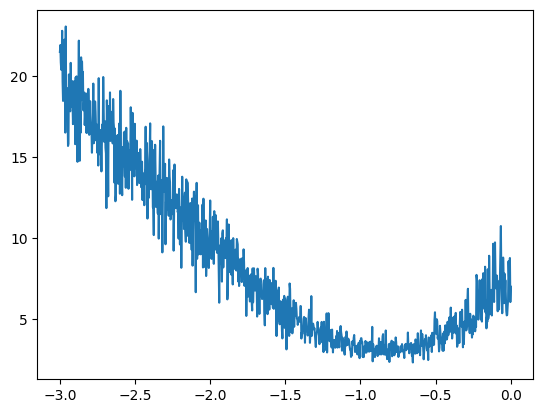

In [231]:
plt.plot(lri, lossi)

We see that the -1.0 is the good region to be in: So 10**-1 = 0.1 is the good lr which we can now set concretely

In [259]:
lri = []
lossi = []


for i in range(10000):

  # MiniBatch Construct
  ix = torch.randint(0, X.shape[0], (32,))

  # Forward pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])
  #print(loss.item())

  # Backward Pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  #lr = lrs[i]
  lr = 0.01           ### Do a lr decay manually
  for p in parameters:
    p.data += -lr * p.grad

  # Track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

# print(loss.item())

In [260]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3083, grad_fn=<NllLossBackward0>)

We can achieve a loss of ~0 if we use much more parameters than the data we are training on, aka Overfitting. So we generally split our data into 3 parts:
1. Train Split (80%): for training parameters
2. Dev/ Validation split (10%) : for setting hyperparameters
3. Test split (10%): for evaluating the model at the end

In [344]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [345]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
len(words)

32033

In [346]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [347]:
# Build the dataset

def build_dataset(words):
  block_size = 3
  X, Y = [], []

  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y


import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [348]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [349]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [350]:
sum(p.nelement() for p in parameters)

11897

In [351]:
for p in parameters:
  p.requires_grad = True

In [352]:
lri = []
lossi = []
stepi = []

In [353]:
for i in range(200000):

  # MiniBatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # Forward Pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # Backward Pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

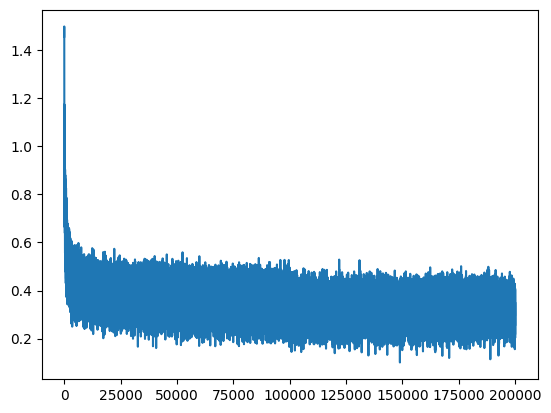

In [354]:
plt.plot(stepi, lossi)

In [355]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1312, grad_fn=<NllLossBackward0>)

In [356]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1699, grad_fn=<NllLossBackward0>)

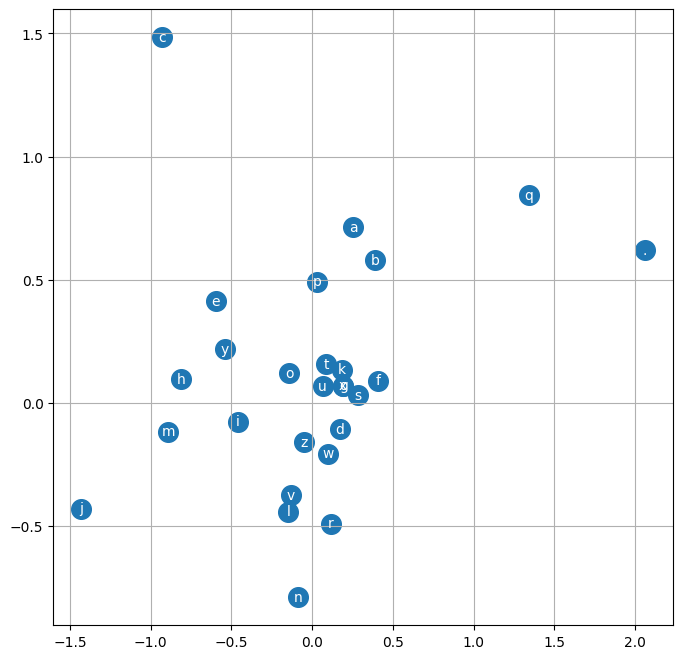

In [357]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)

for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

### Sample from the model

In [359]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

  out = []
  context = [0] * block_size # initialize with all....

  while True:
    emb = C[torch.tensor([context])] # (1, block_size, d)
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break

  print(''.join(itos[i] for i in out))

moha.
mayah.
see.
mel.
ryah.
rethrus.
jerneg.
adelyn.
elin.
emilopaleigh.
estanar.
elle.
malkel.
noshibergahzanel.
janie.
jenionnton.
foub.
macder.
yadli.
els.
